# Langauge Identification - Classification

## Import Libraries

In [2]:
# Import ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessed dataset
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import*
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder
from sklearn.ensemble                import RandomForestClassifier
from sklearn.svm                     import LinearSVC
from sklearn.linear_model            import LogisticRegression
from sklearn.metrics                 import accuracy_score



## Import data and data preparation

In [6]:
dataset=pd.read_csv('./train_set.csv' , index=False, header = 1)
dataset.head()

TypeError: read_csv() got an unexpected keyword argument 'index'

In [17]:
dataset.isnull().sum()

lang_id    0
text       0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='lang_id', ylabel='count'>

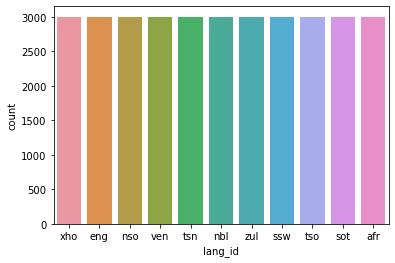

In [18]:
sns.countplot(dataset.lang_id)

## Modelling

### Separate features and target

In [19]:
#split the data into train and test set
text = dataset.text
language = dataset.lang_id
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [20]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  26400
lenght of test data =  6600


#### Feature extraction

In [21]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(26400, 1000)

In [22]:
#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [23]:
#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [24]:
#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [25]:
#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [26]:
#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

In [27]:
#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

In [28]:
#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

In [29]:
#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

In [30]:
#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

In [31]:
#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [32]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()

In [33]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,a,aan,aansoek,abantu,abantwana,abasebenzi,abe,abo,act,aforika,...,yonke,yoo,zabo,ze,zonke,zwa,zwe,zwi,zwine,zwo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

## Train Machine Learning Algorithms using Train Data

In [35]:
#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

In [ ]:
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);

In [ ]:
#apply LogisticRegression() on train dataset
lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);

## Phase 2: Testing

In [ ]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

In [ ]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [ ]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [ ]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [ ]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [ ]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [ ]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [ ]:
char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

In [ ]:
char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

In [ ]:
char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

In [ ]:
char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

In [ ]:
char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

In [ ]:
char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

## Evaluate Machine Learning Algorithms using Test Data

#### Random Forest Classifier

In [ ]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

predictions_char5_rfc = rfc_char5.predict(char5_test_features)         #prediction
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)           #accuracy

predictions_char6_rfc = rfc_char6.predict(char6_test_features)         #prediction
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)           #accuracy

predictions_char7_rfc = rfc_char7.predict(char7_test_features)         #prediction
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)           #accuracy

predictions_char8_rfc = rfc_char8.predict(char8_test_features)         #prediction
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)           #accuracy

predictions_char9_rfc = rfc_char9.predict(char9_test_features)         #prediction
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)           #accuracy

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         #prediction
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)           #accuracy

#### Linear SVC

In [ ]:

predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)         #prediction
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)           #accuracy

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)         #prediction
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)           #accuracy

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)         #prediction
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)           #accuracy

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         #prediction
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)           #accuracy

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)         #prediction
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)           #accuracy

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)         #prediction
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)           #accuracy

#### Logistic Regression

In [ ]:
predictions_uni_lr = lr_uni.predict(uni_test_features)         #prediction
uni_lr = accuracy_score(test_labels, predictions_uni_lr)           #accuracy

predictions_bi_lr = lr_bi.predict(bi_test_features)         #prediction
bi_lr = accuracy_score(test_labels, predictions_bi_lr)           #accuracy

predictions_tri_lr = lr_tri.predict(tri_test_features)         #prediction
tri_lr = accuracy_score(test_labels, predictions_tri_lr)           #accuracy

predictions_char3_lr = lr_char3.predict(char3_test_features)         #prediction
char3_lr = accuracy_score(test_labels, predictions_char3_lr)           #accuracy

predictions_char4_lr = lr_char4.predict(char4_test_features)         #prediction
char4_lr = accuracy_score(test_labels, predictions_char4_lr)           #accuracy

predictions_char5_lr = lr_char5.predict(char5_test_features)         #prediction
char5_lr = accuracy_score(test_labels, predictions_char5_lr)           #accuracy

predictions_char6_lr = lr_char6.predict(char6_test_features)         #prediction
char6_lr = accuracy_score(test_labels, predictions_char6_lr)           #accuracy

predictions_char7_lr = lr_char7.predict(char7_test_features)         #prediction
char7_lr = accuracy_score(test_labels, predictions_char7_lr)           #accuracy

predictions_char8_lr = lr_char8.predict(char8_test_features)         #prediction
char8_lr = accuracy_score(test_labels, predictions_char8_lr)           #accuracy

predictions_char9_lr = lr_char9.predict(char9_test_features)         #prediction
char9_lr = accuracy_score(test_labels, predictions_char9_lr)           #accuracy

predictions_char10_lr = lr_char10.predict(char10_test_features)         #prediction
char10_lr = accuracy_score(test_labels, predictions_char10_lr)           #accuracy

### Best Model

In [ ]:
!pip install prettytable

In [ ]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2),round(char4_lsvc,2),round(char4_lr,2)])
Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2),round(char5_lsvc,2),round(char5_lr,2)])
Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2),round(char6_lsvc,2),round(char6_lr,2)])
Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2),round(char7_lsvc,2),round(char7_lr,2)])
Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2),round(char9_lsvc,2),round(char9_lr,2)])
Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)

## Predictions

### Test Data

In [ ]:
test_df=pd.read_csv('./test_set.csv')
test_df.head()

In [ ]:
test_df.isnull().sum()

In [ ]:
test_x=char3_vector.transform(test_df['text'])

#### Random Forest

In [ ]:
predictions=rfc_char3.predict(test_x)
results=pd.DataFrame({'index':test_df["index"],
                     'lang_id': predictions})
results.to_csv('rfsubmission.csv', index=False)

In [ ]:
sns.countplot(results.lang_id)

#### Linear Support Vector Machines

In [ ]:
predictions=lsvc_char3.predict(test_x)
results=pd.DataFrame({'index':test_df["index"],
                     'lang_id': predictions})
results.to_csv('lsvcsubmission.csv', index=False)

In [ ]:
sns.countplot(results.lang_id)

#### Logistic Regression

In [ ]:
predictions=lr_char3.predict(test_x)
results=pd.DataFrame({'index':test_df["index"],
                     'lang_id': predictions})
results.to_csv('lrsubmission.csv', index=False)

In [ ]:
sns.countplot(results.lang_id)

# Model Explanation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


In [ ]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.shape